### Introduzione

Supponiamo di avere di fronte un foglio quadrettato, avere a disposizione una tavolozza di pastelli
e che un vostro amico vi chieda di ritrarre sul foglio, al meglio delle vostre possibilità, un certo fiore;
tuttavia, impone una condizione: ogni casella del foglio dovrà essere colorata unicamente da un singolo pastello a vostra scelta.

Ecco cosa potremmo aspettarci che accada:

![alt text](immagini_sorgente/fig1.png)

Il processo di conversione di un immagine da analogica a digitale è concettualmente simile all'esempio di cui sopra.
Infatti, se si è stati in grado di colorare ogni singola cella del foglio quadrettato, con un unico colore di una certa sfumatura ed intensità, ottendo
un buon risultato; allora, si sarà anche in grado di definire una matrice, delle stesse dimensioni della griglia sul foglio, i cui coefficienti (in qualche modo)
rappresentino la sfumatura e l'intensità luminosa del colore utilizzato per riempire il corrispondente quadretto sul foglio.

In sostanza, ogni immagine digitale di $M \times N$ pixel, informaticamente parlando, non è altro che una matrice di dimensioni $M \times N$ ed i suoi coefficienti, ai fatti, rappresentano quali sfumature di colore verrano mostrate e in quale posizione. 

Per esempio, nel caso di immagini in scala di grigi, ogni pixel dell'immagine
conterrà solo sfumature di grigio. Per convenzione, la matrice corrispettiva ad un immagine del genere,
avrà come coefficienti soltanto valori interi da un minimo di 0 ad un massimo di 255;
dove: 0 rappresenta il colore nero e 255 rappresenta il colore bianco. 

Invece, poichè un immagine a colori è ottenuta tramite la sovrapposizione di
tre rappresentazioni della stessa immagine: una in scala di rossi, una in scala di verdi ed una in scala di blu; sarà quindi richiesto che il colore di ogni pixel di questa immagine sia rappresentato da vettore di tre valori, ciascuno per ogni intesità del colore rosso, verde e blu.

### Convoluzione

In generale, la convoluzione è
un'operazione matematica (simbolo: *)
che, date due funzioni, ne produce una
terza che è calcolata come segue:
$$ (f*g)(t)=\int{f(\tau)g(t-\tau)d\tau}$$
Nell'imaging, $f$ e $g$ sono funzioni discrete bidimensionali, cioè 
matrici,corrispondenti ad immagini.\\
La convoluzione discreta 2D diventa quindi:
$$(f*g)(x,y)=\sum_{i=0}^M \sum_{j=1}^N f(x,y) g(x-i,y-j), \ \ x,y=0, \ldots N$$

L'applicazione delle convoluzioni in imaging
può essere più facilmente spiegata
graficamente come segue:

- consideriamo una matrice $K$ di dimensione  nxn (di solito n è dispari) il cui punto centrale viene fatto coincidere con un pixel dell'immagine $f$ a cui applicare la convoluzione
- moltiplichiamo i valori nella matrice con i valori dei
pixel corrispondenti, e sommiamo tutti i risultati
- ll valore ottenuto è il valore del pixel centrale nel
risultato
- l'operazione viene ripetuta (spostando la matrice)
per tutti i pixel dell'immagine


All'interno del contesto di questa definizione, la matrice $K$ prenderà il nome di **nucleo di convoluzione** o **kernel di convoluzione**

![alt text](immagini_sorgente/conv.png)

# Pratica guida alla convoluzione di immagini

Mostriamo un esempio di come applicare le definizioni sinora presentate.

In primo luogo, come già evidenziato precedentemente, un immagine non è altro che una matrice (di qualche dimensione) i cui coefficienti rappresentato l'intensità di uno o più colori.

Dunque, assumiamo che la seguente immagine:

![alt-text](immagini_sorgente/bc_zero_cropped.png)

sia la nostra matrice $A$.

E supponiamo che la seguente matrice, sia il nostro nucleo di convoluzione $K$:

![alt-text](immagini_sorgente/fig103_ker.png)

Adesso dobbiamo scegliere come estendere la matrice $A$. Ecco alcune opzioni:

![alt-text](immagini_sorgente/cond_bordo.png)

tutti i diversi modi di estendere diversamente la matrice $A$ prendono il nome di: **condizioni al bordo**.


**ATTENZIONE**: la matrice $A$ ha dimensioni $503 \times 503$ e $K$ ha dimensioni $3 \times 3$, quindi ci occorre un estensione di $A$ di dimensioni $503 + (3-1) \times (503 + (3-1)$.
Ne segue, che le estensioni mostrate hanno dimensioni **ben più estese di quanto dovrebbero!** Sono solo da considerarsi come esempi utili di diverse condizioni al bordo. 

<!---**Attenzione**: la funzione di convoluzione $[K * (\cdot) \; | \; \mathcal{P}]$ **può** essere una funzione lineare. Vale a dire che **per delle opportune scelte del pattern di estensione $\mathcal{P}$**
potrà essere vero che, $\forall \; \alpha,\beta \in \mathbb{R}$:

$$ [K * (\alpha \; X + \beta \; Y) \; | \; \mathcal{P}] = \alpha \; [K * X \; | \; \mathcal{P}] + \beta \; [K * Y \; | \; \mathcal{P}] $$

di qui in avanti, si assumerà che qualunque sia il pattern di estensione $\mathcal{P}$ renda sempre la funzione di convoluzione lineare.---!>

<!---**Osservazione**: Poichè abbiamo presupposto che $[K * (\cdot) \; | \; \mathcal{P}]$ sia una funzione lineare. Allora, sappiamo che esiste un **unica** matrice $T$ di dimensioni $(N*M) \times (N*M)$, tale che:

$$T \, \mathcal{L}(X) = \mathcal{L}( \; [K * X \; | \; \mathcal{P}] \; )$$---!>

![alt text](immagini_sorgente/fig100.png)

In questo caso, il kernel utilizzato sostituisce il valore di ogni pixel con la media aritmetica dei valori contenuti nei quattro pixel ad esso adiacenti.

Ottenendo il seguente effetto di sfocatura:

![alt text](immagini_sorgente/fig103.png)

Consideriamo ora il seguente kernel:

![alt text](immagini_sorgente/kernel_bordi.png)

Osserviamo che, poichè la somma dei coefficienti è 0, sappiamo che se un pixel ha approssimativamente lo stesso colore dei quattro che
gli sono adiacenti, allora verrà rimpiazzato da un valore prossimo a zero; in altre parole, il pixer divverà di colore nero.

Ne segue che tutti e soli i pixel che avranno un valore non nullo, saranno quelli posizionati in mezzo a due regioni di colori contrastanti.
Pertanto, questo è un filtro che evidenzia i bordi dell'immagine

![alt text](immagini_sorgente/fig104.png)

![alt text](immagini_sorgente/fig106.png)

# Sistemi di formazione dell'immagine

In tempi recenti, siamo tutti abituati ad avere nelle nostre tasche fotocamere che, in una frazione di secondo, sono in grado di rappresentare
in maniera più che realistica la maggior parte del mondo che ci circonda.

L'enorme diffusione di questa tecnologia può portare, erroneamente, a credere che il processo di conversione di un immagine da analogica a digitale, sia relativamente semplice:
basta avere un foto-sensore, esporlo a della luce, leggere i voltaggi delle correnti risultati e convertire questi valori in una matrice di pixel, no?

Per iniziare, supponiamo di voler fotografare una singola fonte luminosa puntiforme (per esempio, una stella della volta celeste) ed osserviamo
cosa succederebbe se seguissimo questa procedura intuitiva .






quindi, di seguito, troviamo l'oggetto che vorremmo rappresentare:

![alt text](immagini_sorgente/fig26_bis.png)


mentre questa è l'immagine ottenuta:

![alt text](immagini_sorgente/fig26.png)

come possiamo notare, anzichè avere un immagine con piccolo gruppo di pixel chiari circondati tutti  pixel scuri, l'immagine ottenuta è più simile ad una macchia
centrata nel punto in cui avremmo dovuto vedere la nostra fonte luminosa puntiforme.

Questo fenomeno di 'allargamento' delle fonti luminose puntiformi è del tutto **deterministico** e specificatamente legato all'apparecchiatura
utilizzata per catturare l'immagine.

Matematicamente, possiamo modellizzare il fenomeno così: definiamo una funzione $\mathcal{A}$ che operi come illustrato:

![alt text](immagini_sorgente/psf.png)
![alt text](immagini_sorgente/fig25.jpg)



questa funzione $\mathcal{A}$ prenderà il nome di **Point Spread Function (PSF)**. Un ottima proprietà che molti sistemi di formazione di immagini possiedono, è che la 'forma' della macchia ottenuta
in seguito all'allargamento **NON** dipende dalla posizione della fonte luminosa puntiforme. Per questa ragione, questi sistemi sono denominati **spazio invarianti**.
Altrimenti detto, la PSF **è la stessa** per tutte le possibili posizioni della fonte luminosa puntiforme all'interno dell'immagine.

![alt text](immagini_sorgente/fig27.jpg)

Ad essere più precisi, se $x$ è un immagine che rappresenta perfettamente il nostro oggetto originale e $\mathcal{A}$ è la nostra PSF, avremo che:

$$\mathcal{A}(x) = [K * x \; | \; \mathcal{P}]$$

dove $K$ è un qualche kernel di convoluzione e $\mathcal{P}$ è un pattern di estensione.

Fino a questo punto, sono state descritte fonti **deterministiche** di errore nella rappresentazione di oggetti.
Chiaramente, queste non sono le sole. Infatti, nel corso dell'acquisizione dell'immagine fenomeni aleatori e sostanzialmente imprevedibili danneggiano ulteriormente la nitidezza dell'immagine ottenuta.

Definiamo ora, un immagine $w$ i cui valori dei pixel siano stati selezionati aleatoriamente, secondo la distribuzione del *rumore Gaussiano bianco*.

A questo punto, possiamo fornire un modello matematico **discreto** che spieghi come si sia formata l'immagine $g$ (quella restituita dal nostro sistema di formazione di immagini), a partire da $x$, l'immagine che rappresenta veramente l'oggetto:

$$y^{\delta} = \mathcal{A}(x) + w = [K * x \; | \; \mathcal{P}] + w$$

dove $K$ è un qualche kernel di convoluzione, $\mathcal{P}$ è un pattern di estensione, $w$ è il medesimo di cui sopra e $\mathcal{A}$ è la point spread function.

![alt-text](immagini_sorgente/fig28.jpg)
![alt-text](immagini_sorgente/fig24.jpg)

Più esplicitamente, sapremo:

- $y^{\delta}$, l'immagine sfuocata (dal sistema di formazione di immagini) e rumorosa (a causa di aleatorie fonti d'errore);
- $\mathcal{A}(\cdot)$, la PSF legata al nostro sistema di formazione di immagini;

Dovremo ricavare $x$, l'immagine originaria.

![alt-text](immagini_sorgente/pb_inversi.png)

<!---Alternativamente, utilizzando le osservazioni del capitolo precedente possiamo riscrivere il modello nella seguente forma matriciale:

$$F = \mathcal{A}(f) + w = [K * f \; | \; \mathcal{P}] + w \iff$$

$$\mathcal{L}(F) = \mathcal{L}( \; [K * f \; | \; \mathcal{P}] + w \; ) = \mathcal{L}( \; [K * f \; | \; \mathcal{P}] ) + \mathcal{L}(w) \iff$$
$$\mathcal{L}(F) = T \, \mathcal{L}(f) + \mathcal{L}(w)$$ ---!>

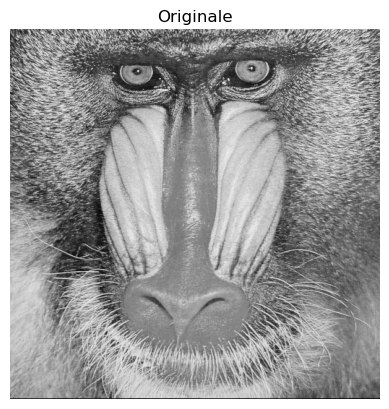

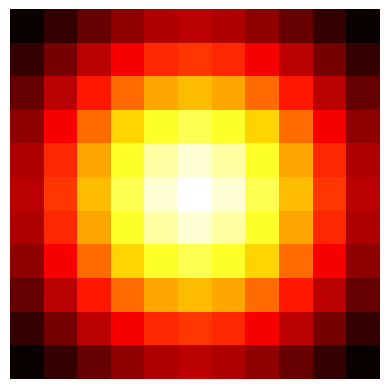

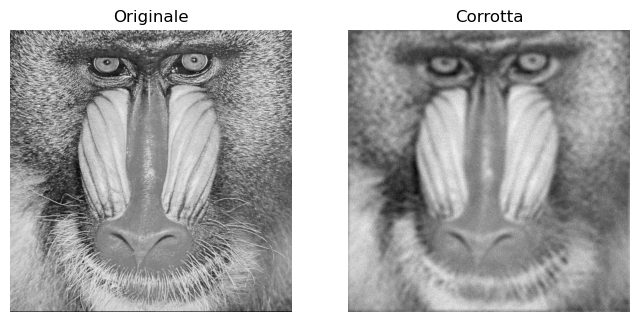

In [ ]:
# CRAZIONE di un PROBLEMA TEST

from ProblemiInversi import operators, solvers, utilities
import numpy as np
import matplotlib.pyplot as plt

from skimage import data

# Lettura dei dati da skimage
# x = data.camera()

x=plt.imread("Baboon.bmp") #x è la matrice che rappresenta l'imm. Baboon.bmp
#!!!!!!!!!!!!!!!!!!!!!!!!!!Baboon.bmp va scaricata, non è presente in questi files

nx, ny = x.shape

# Normalizzazione (nel range [0, 1])
x = x / x.max()

plt.imshow(x, cmap="gray")#per visualizzare l'immagine x con la mappa di colori specificata
plt.title("Originale")
plt.axis("off")
plt.show()

# Definizione kernel di blur e operatore associato
kernel = utilities.gaussian2d_kernel(k=11, sigma=3.5)
A = operators.ConvolutionOperator(kernel)

# Visualizzazione kernel di blur (PSF)
plt.imshow(kernel, cmap='hot')
plt.axis('off')
plt.show()

# Sfocatura dell'immagine e aggiunta di rumore
y = A(x)
y_delta = y + utilities.gaussian_noise(y, noise_level=0.05)#y=imm a cui applicare il rumore, noise_level è il lvl di rumore, 0.1 è gia alto

# Visualizzazione problema test
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x, cmap="gray")#x imm originale
plt.title("Originale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(y_delta, cmap="gray")#y_delta è x con rumore e sfocatura 
plt.axis("off")
plt.title("Corrotta")
plt.show()

<!--Alternativamente,  possiamo riscrivere il modello nella seguente forma matriciale:


$$ y^{\delta}=Ax+w$$ 

dove A e'una matrice di dimensione $(M*N)*(M*N)* che contiene le informazioni del nucleo di convoluzione ed e'tale che:

$$Ax=K*x$$

Un primo possibile approccio si potrebbe ottenere riformulando il problema nel formato di quello ai minimi quadrati; vale a dire, localizzare $x$ tale che:

$$ \lVert A \, x  - (y^{\delta} - w) \rVert_{2} $$

sia minimizzata.

Tuttavia, questa prima formulazione non ha la fortuna di condurci a delle buone soluzioni, in quanto è numericamente instabile e decisamente mal condizionata.

Infatti questa formulazione è del tutto equivalente a calcolare:

$$x = T^{-1} \, g - T^{-1} \, e$$

e purtroppo $T^{-1} \, e$ (anche chiamato rumore inverso) tenderà, quasi sempre, a risaltare eccessivamente nelle soluzioni $x$, localizzate con questo metodo.

Ecco, due esempi di cosa potrebbe succedere se utilizzassimo questo approccio per ricostruire delle immagini:--!>

Alternativamente,  possiamo riscrivere il modello nella seguente forma matriciale:


$$ y^{\delta}=Ax+w$$

dove A e'una matrice di dimensione $(M*N)*(M*N)* che contiene le informazioni del nucleo di convoluzione ed e'tale che:

$$Ax=K*x$$

## Soluzione naive

La ***soluzione naive*** è quella ottenuta risolvendo il problema di minimi quadrati:

$$min_x ||Ax-y^{\delta}||_2^2$$



![alt-text](immagini_sorgente/fig29.jpg)
![alt-text](immagini_sorgente/soluzione_naive.png)

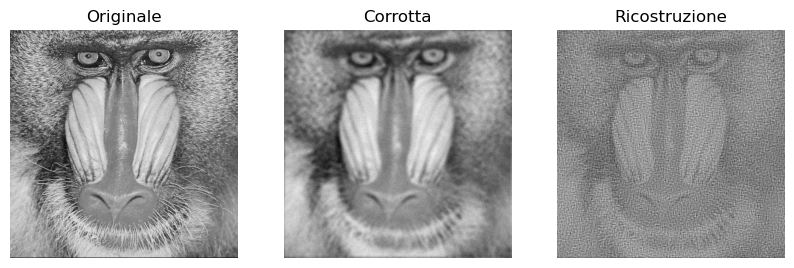

In [4]:
#Calcolo della soluzione NAIVE come soluzione del problema dei minimi quadrati
# con le equazioni normali

# CGLS
cgls_solver = solvers.CGLS(A)

# Scelta di x0, kmax, atolf, tolx
x0 = np.zeros_like(x)
kmax = 30
tolf = 1e-8
tolx = 1e-8

# Soluzione
x_cgls = cgls_solver.solve(y_delta, x0, kmax, tolf, tolx)



# Visualizzazione ricostruzione
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(x, cmap="gray")
plt.title("Originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(y_delta, cmap="gray")
plt.axis("off")
plt.title("Corrotta")

plt.subplot(1, 3, 3)
plt.imshow(x_cgls, cmap="gray")
plt.axis("off")
plt.title("Ricostruzione")
plt.show()

Essendo la matrice A di dimensione non molto piccola, calcolare la soluzione con la SVD è troppo costoso (ricordiamo che la complessità computazionale della fattorizzazione SVD è $O(4/3 mn^2)$ per una matrice di dimensione m*n). 
Quindi si risolvono le equazioni normali:

$$A^TAx=A^Ty^{\delta}$$

Il sistema ha matrice simmetrica e definita positiva (supponiamo A di rango massimo) e per ragioni computazionali è convenirente utilizzare un metodo iterativo. Quindi applichiamo il CGLS al sistema delle equazioni normali.

### Metriche di valutazione per la ricostruzione

In un problema test, per valutare la qualita' della ricostruzione ottenuta, oltre ad una valutazione visiva,  si utilizzano delle ***metriche***.
Queste sono costituite da un numero che deve rappresentare l' accuratezza della soluzione. In generale non rispecchiano sempre quella che e'la valutazione visiva, anche perche' un solo numero difficilmente potrebbe rispecchiare la  complessita'di una immagine. Ci sono diverse metriche, proprio per avere diversi punti di vista, che in generale richiedono la conoscenza di $x_{GT}$, la ground truth. 

In particolare, considereremo (detta $x$ l ímmagine ricostruita):
- L' errore relativo (ER) definito come:

$$ER=\frac{||x-x_{GT}||_2^2}{||x_{GT}||_2^2}$$

- Il rapporto segnale-rumore misurato come Peak to Signal Noise Ratio (PSNR) definito come:

$$PSNR= 10 log_{10}\frac{(max_{i,j}|x_{i,j}|)^2}{MSE}$$

dove MSE indica l' Errore Quadratico Medio (Mean Squared Error):

$$MSE=\frac{||x-x_{GT}||_2^2}{M*N}$$

Dove M,N sono le dimensioni dell' immagine.
Ha valori in [0,100] e piu' e'alto il valore migliore e'il rapporto sganle rumore (quindi meno rumorosa e' l'immagine).

- Structural Similarity Index ($SSIM$). Questo indice ha una definizione piuttosto complessa che non riportiamo qui. Dovrebbe essere quello piu' fedele alla qualita' visiva dell'immagine ed ha valori in [0,1]. Piu' e' vicino a uno, migliore e' la qualita' dell'  immagine.

La ricostruzione del problema inverso è chiaramente corrotta da rumore e di qualità molto scadente. E' lo stesso fenomeno che avevamo osservato nel caso dei problemi inversi 1D, dovuto al mal condizionamento della matrice e alle condizioni di Picard non completamente soddisfatte.

In [5]:
#Calcolo metrice di errore
print('ER',utilities.rel_err(x_cgls,x))
print('PSNR',utilities.psnr(x_cgls,x))
print('SSIM',utilities.ssim(x_cgls,x))

ER 0.5699410075397444
PSNR 9.453682728524633
SSIM 0.17084572024481376


Definizione (conversione lessicografica per righe):

Sia $A$ una matrice $M \times N$, definiamo la funzione $\mathcal{L}: \mathbb{R}^{M \times N} \to \mathbb{R}^{N * M}$ come segue:

$\mathcal{L}(A)$ è un vettore di dimensione $N * M$, le cui:
- prime $N$ componenti sono la prima riga di $A$, letta da sinistra a destra;
- seconde $N$ componenti sono la seconda riga di $A$, letta da sinistra a destra;
- $\dots$
- $M$-esime $N$ componenti sono la $M$-esima riga di $A$, letta da sinistra a destra.

Analogamente si definisce la conversione lessicografica per colonne.